In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import requests
import pandas as pd

In [ ]:
# Limpieza del DATASET
csv_file = requests.get("https://raw.githubusercontent.com/Jaider0111/NSFDA_09_Term_Project/main/CERTIFICACIONES_SIG24_08_WFL1.csv")
with open("data.csv", "wt") as f:
    f.write(csv_file.text)
dataset = pd.read_csv("data.csv", on_bad_lines='skip')
dataset['sector'] = dataset['sector'].str.split(' - ')
dataset['tramo'] = dataset['tramo'].str.split(' - ')
dataset['clean_data'] = np.select(
    [
        dataset['sector'].str.len() > 1
    ], 
    [
        dataset['sector']
    ], 
    default=dataset['tramo']
)
dataset['origen'] = dataset['clean_data'].str[0]
dataset['dest'] = dataset['clean_data'].str[1:]
dataset = dataset[dataset['dest'].str.len() > 0]
dataset[['origen', 'dest']].to_csv('fixed_data.csv', index=False, )
sc = dataset[dataset['dest'].str.len() > 1]
di = {
    'origen': sc['dest'].str[:-1].array,
    'desc': sc['dest'].str[1:]
}
# dataset = dataset.append(df2, ignore_index = True)
# sc.shape


In [ ]:
# Carga del dataset limpio
excel_file = requests.get("https://github.com/Jaider0111/NSFDA_09_Term_Project/blob/main/Dataset_TP.xlsx?raw=true")
with open("Dataset_TP.xlsx", "wb") as f:
    f.write(excel_file.content)
datos = pd.read_excel('Dataset_TP.xlsx',sheet_name = 'Final data')

In [ ]:
# Eliminacion de caracteres innecesarios
caracteres = ["'","[","]"]
for x in caracteres:
  datos.origen = datos.origen.str.replace(x,"")
  datos.dest = datos.dest.str.replace(x,"")
datos

<ipython-input-5-970cd1e66221>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos.origen = datos.origen.str.replace(x,"")
<ipython-input-5-970cd1e66221>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datos.dest = datos.dest.str.replace(x,"")


,origen,dest
0,Aguachica,Gamarra
1,Gamarra,Puerto Capulco
2,Aguaclara,Circunvalar de Aguachica
3,Girardot,Cambao
4,Puerto Salgar,Río Ermitaño
...,...,...
447,Palmaseca,El Cerrito
448,Palmaseca,El Cerrito
449,Puerto López,Puerto Gaitán
450,Glorieta K8,Redoma el Salado


In [ ]:
#Eliminacion de acentos
reempla = [("á","a"),("é","e"),("í","i"),("ó","o"),("ú","u")]
for x in reempla:
    datos.origen = datos.origen.str.replace(x[0],x[1])
    datos.dest = datos.dest.str.replace(x[0],x[1])  
datos['origen'] = datos['origen'].str.lstrip()
datos['origen'] = datos['origen'].str.rstrip()
datos['dest'] = datos['dest'].str.lstrip()
datos['dest'] = datos['dest'].str.rstrip()
datos = datos.drop_duplicates()
datos.origen.unique()                               

array(['Aguachica', 'Gamarra', 'Aguaclara', 'Girardot', 'Puerto Salgar',
       'Bogota', 'Malaga', 'Santo Domingo', 'El Limon',
       'Puente Valencia sobre el rio Cauca', 'Transversal Buenaventura',
       'Villavicencio', 'Cucuta', 'Transversal Carmen', 'Bosconia',
       'Valledupar', 'Maicao', 'Caucasia', 'Neiva', 'Chaparral',
       'Variante La Dorada', 'Medellin', 'Ortega', 'Pipiral', 'Choachi',
       'Garzon', 'Cruce Tesalia', 'Barranca de Upia', 'Mumbu',
       'La Palmera', 'Brisas', 'Buenaventura', 'El Portal', 'Ocaña',
       'Puerto Lopez', 'Honda', 'Belen', 'Yacopi', 'Natagaima',
       'Choconta', 'El Secreto', 'Paso por el Puente sobre el Rio Ocoa',
       'San Gil', 'Castilla', 'Puerto Rico', 'Buga', 'Puente Real',
       'Caqueza', 'Balsillas', 'Las Animas', 'Chinchina',
       'San Jose del Guaviare', 'Villagarzon', 'Florencia', 'Aracataca',
       'Barranquilla', 'Rio Ariguani', 'Sachica', 'Puente La Libertad',
       'Monterrey', 'La Uribe', 'La Lejia', 'Pamplon

In [ ]:
datos.dest.unique()   

array(['Gamarra', 'Puerto Capulco', 'Circunvalar de Aguachica', 'Cambao',
       'Rio Ermitaño', 'Sopo', 'Los Curos', 'Mina Blanca', 'La Acequia',
       'Rozo', 'Cali', 'Villavicencio', 'Puerto Carreño',
       'Puente Binacional Tienditas', 'Bosconia', 'Valledupar', 'Maicao',
       'Puerto Bolivar', 'Zaragoza', 'Balsillas', 'Ortega',
       'Puerto Salgar', 'Bogota', 'Guamo', 'Choachi', 'Ubaque', 'Neiva',
       'Teruel', 'Monterrey', 'Santa Cecilia', 'Presidente', 'Guasca',
       'Guateque', 'El Antojo', 'Alto del Pozo', 'Puerto Gaitan',
       'Villeta', 'Sacama', 'La Palma', 'Castilla', 'Natagaima', 'Brisas',
       'Aguaclara', 'Onzaga', 'Puente Saldaña', 'Girardot', 'Granada',
       'Puerto Inirida', 'PUERTO BOGOTÁ)', 'Caqueza', 'El Tablon',
       'Santo  Domingo', 'Estacion Uribe', 'Puerto Rico', 'Saravena',
       'Cienaga', 'Santa Marta', 'Aracataca', 'Tunja', 'Fresno', 'Yopal',
       'Los Patios', 'Buenavista', 'El Zulia', 'San Onofre',
       'San Juan de Villalobos', 

In [ ]:
all_nodes = pd.concat([pd.Series(datos.origen.unique()),pd.Series(datos.dest.unique())])

In [ ]:
all_nodes_uni = all_nodes.unique()

In [ ]:
all_nodes_df = pd.DataFrame(all_nodes_uni)
all_nodes_df = all_nodes_df.drop_duplicates()

In [ ]:
all_nodes_df.insert(0, 'ID', range(1, len(all_nodes_df)+1))


In [ ]:
all_nodes_df[276:278]

,ID,0
276,277,Tocancipa
277,278,Puente Puerto Salgar


In [ ]:
datos1 = datos.merge(all_nodes_df,left_on='origen',right_on=0,how='left')
datos2 = datos1.merge(all_nodes_df,left_on='dest',right_on=0,how='left')
datos2

,origen,dest,ID_x,0_x,ID_y,0_y
0,Aguachica,Gamarra,1,Aguachica,2,Gamarra
1,Gamarra,Puerto Capulco,2,Gamarra,328,Puerto Capulco
2,Aguaclara,Circunvalar de Aguachica,3,Aguaclara,329,Circunvalar de Aguachica
3,Girardot,Cambao,4,Girardot,330,Cambao
4,Puerto Salgar,Rio Ermitaño,5,Puerto Salgar,83,Rio Ermitaño
...,...,...,...,...,...,...
404,Calarca,Cajamarca,274,Calarca,184,Cajamarca
405,Paso de La Torre,Siberia,324,Paso de La Torre,437,Siberia
406,Palmaseca,El Cerrito,325,Palmaseca,438,El Cerrito
407,Glorieta K8,Redoma el Salado,326,Glorieta K8,439,Redoma el Salado


In [ ]:
edges = list(datos2[['ID_x','ID_y']].itertuples(index=False, name=None))
edges

[(1, 2),
 (2, 328),
 (3, 329),
 (4, 330),
 (5, 83),
 (6, 183),
 (7, 331),
 (8, 332),
 (9, 333),
 (9, 334),
 (10, 170),
 (11, 12),
 (12, 335),
 (13, 336),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 337),
 (18, 338),
 (19, 49),
 (20, 23),
 (21, 5),
 (22, 6),
 (23, 339),
 (24, 12),
 (6, 25),
 (25, 340),
 (26, 19),
 (27, 341),
 (28, 60),
 (29, 76),
 (30, 116),
 (6, 342),
 (31, 174),
 (32, 12),
 (33, 343),
 (34, 344),
 (35, 345),
 (36, 281),
 (37, 211),
 (38, 346),
 (39, 44),
 (19, 39),
 (40, 31),
 (41, 3),
 (42, 12),
 (43, 347),
 (44, 348),
 (44, 4),
 (45, 349),
 (46, 350),
 (36, 351),
 (47, 48),
 (48, 352),
 (49, 353),
 (45, 332),
 (50, 6),
 (51, 122),
 (52, 45),
 (53, 354),
 (36, 5),
 (54, 45),
 (55, 355),
 (56, 142),
 (57, 55),
 (58, 196),
 (59, 132),
 (60, 133),
 (61, 349),
 (62, 354),
 (63, 327),
 (64, 173),
 (65, 112),
 (66, 141),
 (67, 218),
 (68, 356),
 (69, 70),
 (70, 357),
 (71, 358),
 (72, 359),
 (12, 35),
 (73, 360),
 (74, 77),
 (75, 50),
 (76, 361),
 (77, 167),
 (78, 266),
 (79, 2

In [ ]:
B = nx.Graph()

B.add_edges_from(edges)

In [ ]:
nx.is_connected(B)

False

In [ ]:
dict(sorted(nx.closeness_centrality(B).items(), key=lambda item: item[1]))

{7: 0.00228310502283105,
 331: 0.00228310502283105,
 27: 0.00228310502283105,
 341: 0.00228310502283105,
 33: 0.00228310502283105,
 343: 0.00228310502283105,
 38: 0.00228310502283105,
 346: 0.00228310502283105,
 68: 0.00228310502283105,
 356: 0.00228310502283105,
 71: 0.00228310502283105,
 358: 0.00228310502283105,
 72: 0.00228310502283105,
 359: 0.00228310502283105,
 129: 0.00228310502283105,
 378: 0.00228310502283105,
 135: 0.00228310502283105,
 380: 0.00228310502283105,
 148: 0.00228310502283105,
 386: 0.00228310502283105,
 177: 0.00228310502283105,
 391: 0.00228310502283105,
 185: 0.00228310502283105,
 393: 0.00228310502283105,
 188: 0.00228310502283105,
 394: 0.00228310502283105,
 197: 0.00228310502283105,
 397: 0.00228310502283105,
 199: 0.00228310502283105,
 398: 0.00228310502283105,
 209: 0.00228310502283105,
 402: 0.00228310502283105,
 244: 0.00228310502283105,
 416: 0.00228310502283105,
 276: 0.00228310502283105,
 425: 0.00228310502283105,
 299: 0.00228310502283105,
 427: 0.0

In [ ]:
dict(sorted(nx.degree_centrality(B).items(), key=lambda item: item[1]))

{1: 0.00228310502283105,
 328: 0.00228310502283105,
 329: 0.00228310502283105,
 330: 0.00228310502283105,
 7: 0.00228310502283105,
 331: 0.00228310502283105,
 8: 0.00228310502283105,
 333: 0.00228310502283105,
 334: 0.00228310502283105,
 10: 0.00228310502283105,
 11: 0.00228310502283105,
 336: 0.00228310502283105,
 14: 0.00228310502283105,
 337: 0.00228310502283105,
 338: 0.00228310502283105,
 20: 0.00228310502283105,
 21: 0.00228310502283105,
 339: 0.00228310502283105,
 24: 0.00228310502283105,
 340: 0.00228310502283105,
 27: 0.00228310502283105,
 341: 0.00228310502283105,
 342: 0.00228310502283105,
 33: 0.00228310502283105,
 343: 0.00228310502283105,
 344: 0.00228310502283105,
 345: 0.00228310502283105,
 37: 0.00228310502283105,
 38: 0.00228310502283105,
 346: 0.00228310502283105,
 42: 0.00228310502283105,
 348: 0.00228310502283105,
 350: 0.00228310502283105,
 351: 0.00228310502283105,
 47: 0.00228310502283105,
 353: 0.00228310502283105,
 355: 0.00228310502283105,
 61: 0.002283105022

In [ ]:

dict(sorted(nx.betweenness_centrality(B).items(), key=lambda item: item[1]))

{1: 0.0,
 328: 0.0,
 329: 0.0,
 330: 0.0,
 7: 0.0,
 331: 0.0,
 8: 0.0,
 333: 0.0,
 334: 0.0,
 10: 0.0,
 11: 0.0,
 336: 0.0,
 14: 0.0,
 337: 0.0,
 338: 0.0,
 20: 0.0,
 21: 0.0,
 339: 0.0,
 24: 0.0,
 340: 0.0,
 27: 0.0,
 341: 0.0,
 342: 0.0,
 33: 0.0,
 343: 0.0,
 344: 0.0,
 345: 0.0,
 37: 0.0,
 38: 0.0,
 346: 0.0,
 42: 0.0,
 348: 0.0,
 350: 0.0,
 351: 0.0,
 47: 0.0,
 353: 0.0,
 355: 0.0,
 61: 0.0,
 62: 0.0,
 68: 0.0,
 356: 0.0,
 69: 0.0,
 357: 0.0,
 71: 0.0,
 358: 0.0,
 72: 0.0,
 359: 0.0,
 360: 0.0,
 74: 0.0,
 75: 0.0,
 361: 0.0,
 79: 0.0,
 362: 0.0,
 82: 0.0,
 364: 0.0,
 85: 0.0,
 365: 0.0,
 366: 0.0,
 92: 0.0,
 95: 0.0,
 97: 0.0,
 367: 0.0,
 368: 0.0,
 369: 0.0,
 106: 0.0,
 370: 0.0,
 371: 0.0,
 372: 0.0,
 115: 0.0,
 373: 0.0,
 119: 0.0,
 120: 0.0,
 375: 0.0,
 376: 0.0,
 125: 0.0,
 377: 0.0,
 129: 0.0,
 378: 0.0,
 130: 0.0,
 379: 0.0,
 135: 0.0,
 380: 0.0,
 381: 0.0,
 138: 0.0,
 140: 0.0,
 383: 0.0,
 384: 0.0,
 145: 0.0,
 385: 0.0,
 147: 0.0,
 148: 0.0,
 386: 0.0,
 150: 0.0,
 152: 0.0

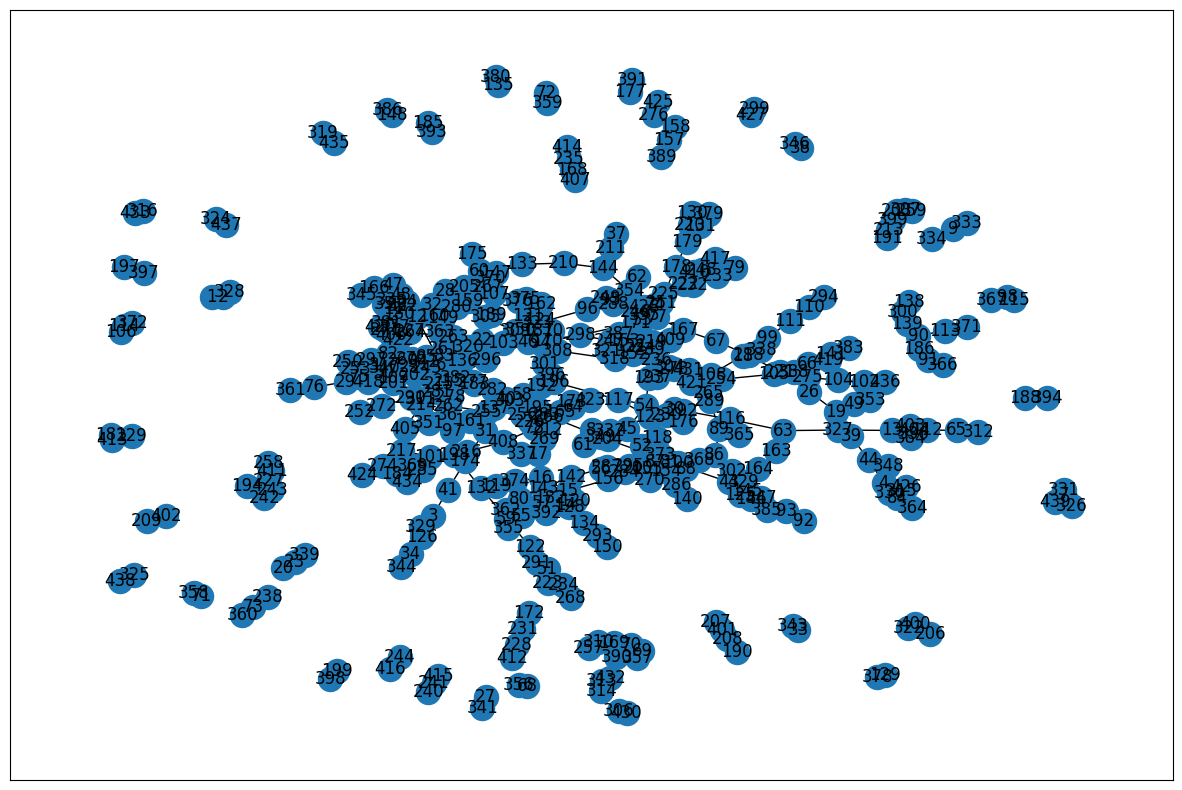

In [ ]:
fig, ax = plt.subplots()
nx.draw_networkx(B)
fig.set_size_inches(15, 10)
plt.show()

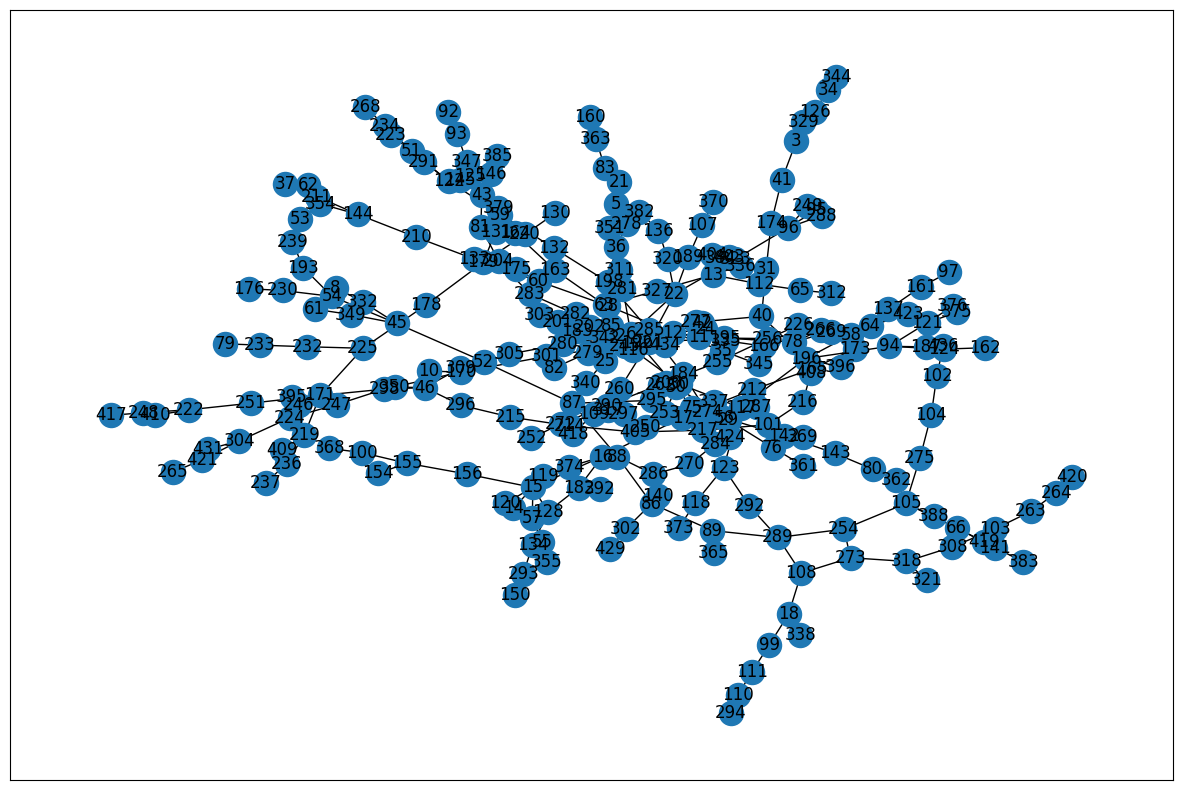

In [ ]:
Bcc = sorted(nx.connected_components(B), key=len, reverse=True)
fig, ax = plt.subplots()
B0 = B.subgraph(Bcc[0])
nx.draw_networkx(B0)
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
nx.is_connected(B0)

True

In [ ]:
dict(sorted(nx.closeness_centrality(B0).items(), key=lambda item: item[1]))

{368: 0.04476885644768856,
 150: 0.04476885644768856,
 355: 0.04677966101694915,
 154: 0.04684317718940937,
 100: 0.046859083191850594,
 293: 0.046859083191850594,
 55: 0.04906666666666667,
 134: 0.04913654975965818,
 155: 0.04913654975965818,
 362: 0.05002718868950517,
 119: 0.05128205128205128,
 392: 0.051358392259024936,
 14: 0.05153099327856609,
 120: 0.05153099327856609,
 57: 0.0515695067264574,
 156: 0.05160807778608826,
 128: 0.051627384960718295,
 80: 0.052651659671880964,
 420: 0.05326128907757623,
 374: 0.05404346974740552,
 182: 0.05412826044322416,
 15: 0.0543200157449321,
 143: 0.05554437512577984,
 264: 0.056246178928061955,
 337: 0.05665024630541872,
 16: 0.05709557302441043,
 287: 0.058673469387755105,
 142: 0.05874840357598978,
 130: 0.05896176030762658,
 379: 0.05896176030762658,
 294: 0.058999572466866185,
 8: 0.059189363070984345,
 61: 0.059189363070984345,
 436: 0.059202059202059204,
 312: 0.059482758620689656,
 263: 0.059559775571860166,
 17: 0.06003915597128562,


In [ ]:
dict(sorted(nx.degree_centrality(B0).items(), key=lambda item: item[1]))

{329: 0.0036231884057971015,
 8: 0.0036231884057971015,
 10: 0.0036231884057971015,
 11: 0.0036231884057971015,
 336: 0.0036231884057971015,
 14: 0.0036231884057971015,
 337: 0.0036231884057971015,
 338: 0.0036231884057971015,
 21: 0.0036231884057971015,
 24: 0.0036231884057971015,
 340: 0.0036231884057971015,
 342: 0.0036231884057971015,
 344: 0.0036231884057971015,
 345: 0.0036231884057971015,
 37: 0.0036231884057971015,
 42: 0.0036231884057971015,
 350: 0.0036231884057971015,
 351: 0.0036231884057971015,
 355: 0.0036231884057971015,
 61: 0.0036231884057971015,
 62: 0.0036231884057971015,
 75: 0.0036231884057971015,
 361: 0.0036231884057971015,
 79: 0.0036231884057971015,
 362: 0.0036231884057971015,
 82: 0.0036231884057971015,
 85: 0.0036231884057971015,
 365: 0.0036231884057971015,
 92: 0.0036231884057971015,
 95: 0.0036231884057971015,
 97: 0.0036231884057971015,
 368: 0.0036231884057971015,
 369: 0.0036231884057971015,
 370: 0.0036231884057971015,
 373: 0.0036231884057971015,
 11

In [ ]:
dict(sorted(nx.betweenness_centrality(B0).items(), key=lambda item: item[1]))

{329: 0.0,
 8: 0.0,
 10: 0.0,
 11: 0.0,
 336: 0.0,
 14: 0.0,
 337: 0.0,
 338: 0.0,
 21: 0.0,
 24: 0.0,
 340: 0.0,
 342: 0.0,
 344: 0.0,
 345: 0.0,
 37: 0.0,
 42: 0.0,
 350: 0.0,
 351: 0.0,
 355: 0.0,
 61: 0.0,
 62: 0.0,
 75: 0.0,
 361: 0.0,
 79: 0.0,
 362: 0.0,
 82: 0.0,
 85: 0.0,
 365: 0.0,
 92: 0.0,
 95: 0.0,
 97: 0.0,
 368: 0.0,
 369: 0.0,
 370: 0.0,
 373: 0.0,
 119: 0.0,
 120: 0.0,
 375: 0.0,
 376: 0.0,
 125: 0.0,
 130: 0.0,
 379: 0.0,
 140: 0.0,
 383: 0.0,
 384: 0.0,
 145: 0.0,
 385: 0.0,
 150: 0.0,
 388: 0.0,
 154: 0.0,
 160: 0.0,
 162: 0.0,
 166: 0.0,
 175: 0.0,
 176: 0.0,
 392: 0.0,
 187: 0.0,
 395: 0.0,
 396: 0.0,
 200: 0.0,
 201: 0.0,
 403: 0.0,
 404: 0.0,
 409: 0.0,
 410: 0.0,
 223: 0.0,
 226: 0.0,
 237: 0.0,
 245: 0.0,
 246: 0.0,
 417: 0.0,
 418: 0.0,
 249: 0.0,
 419: 0.0,
 252: 0.0,
 420: 0.0,
 265: 0.0,
 268: 0.0,
 291: 0.0,
 269: 0.0,
 423: 0.0,
 424: 0.0,
 287: 0.0,
 288: 0.0,
 294: 0.0,
 429: 0.0,
 431: 0.0,
 311: 0.0,
 312: 0.0,
 434: 0.0,
 321: 0.0,
 436: 0.0,
 303: 